CNN Model for classifing images of Japanese hiragana.

This model will be a simple implemtation to test basic concepts.

In [1]:
import sys
import os

In [2]:
labels = []

# Read labels from hiragana encoding file
with open("D:\\Universiteit\\2022 - 2023 - Year 4\\Japan\\Machine Learning\\Final Assignment\\data\\hiragana\\encoding.txt", mode="r", encoding="utf-8") as f:
    labels = list(eval(f.read()).keys())

# ordering
ls = labels
indeces = sorted([str(i) for i in range(0, len(ls))])
ordered_labels = [ls[int(i)] for i in indeces]

print(labels)
print(len(labels))
print(ordered_labels)

# Save labels back to use
with open("D:\\Universiteit\\2022 - 2023 - Year 4\\Japan\\Machine Learning\\Final Assignment\\data\\util\\hiragana_labels.txt", mode="w", encoding="utf-8") as f:
    f.write("".join(ordered_labels))

['あ', 'い', 'う', 'え', 'お', 'か', 'が', 'き', 'ぎ', 'く', 'ぐ', 'け', 'げ', 'こ', 'ご', 'さ', 'ざ', 'し', 'じ', 'す', 'ず', 'せ', 'ぜ', 'そ', 'ぞ', 'た', 'だ', 'ち', 'ぢ', 'つ', 'づ', 'て', 'で', 'と', 'ど', 'な', 'に', 'ぬ', 'ね', 'の', 'は', 'ば', 'ぱ', 'ひ', 'び', 'ぴ', 'ふ', 'ぶ', 'ぷ', 'へ', 'べ', 'ぺ', 'ほ', 'ぼ', 'ぽ', 'ま', 'み', 'む', 'め', 'も', 'や', 'ゆ', 'よ', 'ら', 'り', 'る', 'れ', 'ろ', 'わ', 'を', 'ん']
71
['あ', 'い', 'ぐ', 'け', 'げ', 'こ', 'ご', 'さ', 'ざ', 'し', 'じ', 'す', 'う', 'ず', 'せ', 'ぜ', 'そ', 'ぞ', 'た', 'だ', 'ち', 'ぢ', 'つ', 'え', 'づ', 'て', 'で', 'と', 'ど', 'な', 'に', 'ぬ', 'ね', 'の', 'お', 'は', 'ば', 'ぱ', 'ひ', 'び', 'ぴ', 'ふ', 'ぶ', 'ぷ', 'へ', 'か', 'べ', 'ぺ', 'ほ', 'ぼ', 'ぽ', 'ま', 'み', 'む', 'め', 'も', 'が', 'や', 'ゆ', 'よ', 'ら', 'り', 'る', 'れ', 'ろ', 'わ', 'を', 'き', 'ん', 'ぎ', 'く']


In [3]:
# Batch prep
batch_size = 1024
val_split = 0.2
h, w = 64, 64

classes = [str(i) for i in range(0, len(ls))]

In [4]:
import matplotlib.pyplot as plt
import matplotlib.font_manager as plt_fm
import numpy as np

show_sample_font = plt_fm.FontProperties(fname=os.path.join("..", "fonts", "NotoSerifCJKjp-Regular.otf"), size=20)

def show_image(img: np.array, label: str):
    plt.figure(figsize=(2,2))
    plt.title(label=label, font=show_sample_font)
    plt.axis('off')
    plt.imshow(img.astype(np.float64), cmap='gray')

In [5]:
# Set up training data set for use with PyTorch
import torch
import torchvision
import torchvision.transforms as transforms
from torchvision.datasets import VisionDataset

from typing import Tuple, Any, Callable, Optional

from PIL import Image


class HiraganaDataset(VisionDataset):
    def __init__(self, root_dir, transform: Optional[Callable] = None, target_transform: Optional[Callable]=None):
        super().__init__(root_dir, transform=transform, target_transform=target_transform)

        self.images = []
        self.labels = []
        
        for folder in os.listdir(self.root):
            if folder == "encoding.txt":
                continue
            for file in os.listdir(os.path.join(self.root, folder)):
                self.labels.append(folder)
                self.images.append(os.path.join(self.root, folder, file))
            
        
    def __len__(self):
        return len(self.images)
    
    def __getitem__(self, idx: int) -> Tuple[Any, Any]:
        img_path, target = self.images[idx], self.labels[idx]        
        
        # ensure target is tensor and not tuple
        target = torch.tensor(int(target))
        
        img = Image.open(img_path)
        
        if self.transform is not None:
            img = self.transform(img)
        
        if self.target_transform is not None:
            target = self.target_transform(target)
            
        # Return as tensor
        return img, target
    
class TestDataset(VisionDataset):
    def __init__(self, data_size=50000):
        self.data_size = data_size
        
    def __len__(self):
        return self.data_size
    
    def __getitem__(self, index: int) -> Any:
        return index

Train size: 2192
Validation size: 548


C:\Users\joris\AppData\Roaming\Python\Python310\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


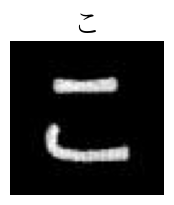

In [6]:
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Resize((h, w)),
    transforms.Normalize((0.5,), (0.5,))
    ]
)

full_data_set = HiraganaDataset(root_dir="D:\\Universiteit\\2022 - 2023 - Year 4\\Japan\\Machine Learning\\Final Assignment\\data\\hiragana",
                                transform=transform)

# Split data set into training and validation sets
train_size = int((1 - val_split) * len(full_data_set))
val_size = len(full_data_set) - train_size
train_dataset, val_dataset = torch.utils.data.random_split(full_data_set, [train_size, val_size])

show_image(train_dataset[0][0].squeeze().numpy(), labels[int(train_dataset[0][1])])

print("Train size: " + str(len(train_dataset)))
print("Validation size: " + str(len(val_dataset)))

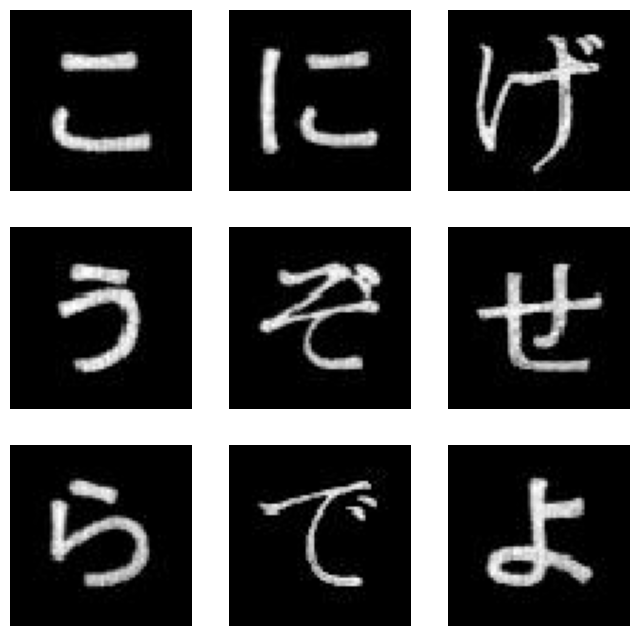

In [7]:
fig = plt.figure(figsize=(8, 8))
for i in range(9):
    ax = fig.add_subplot(3, 3, i + 1)
    plt.axis('off')
    plt.imshow(train_dataset[i][0].numpy().reshape((h, w)).astype(np.float64), cmap='gray')

In [8]:
# inspect length of train and test set
print(len(train_dataset))
print(len(val_dataset))

2192
548


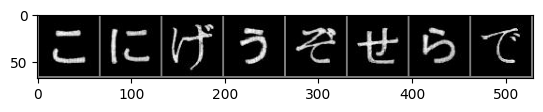

tensor([13, 36, 12,  2, 24, 21, 63, 32])


In [9]:
from torch.utils.data import DataLoader

def imgshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

train_loader = DataLoader(train_dataset, batch_size=8)
val_loader = DataLoader(val_dataset, batch_size=8)

train_iterator = iter(train_loader)
val_iterator = iter(val_loader)

test_images, test_labels = next(train_iterator)

imgshow(torchvision.utils.make_grid(test_images))
print(test_labels)

# MODEL TIME

Image preprocessing, Random rotatation, zoom and shift etc.

In [66]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim


class CNN(nn.Module):
    def __init__(self):
        super(CNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 8, (5, 5))
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(8, 16, (5, 5))
        self.fc1 = nn.Linear(16 * 13 * 13, 256)
        self.fc2 = nn.Linear(256, 128)
        self.fc3 = nn.Linear(128, 71)
        self.dropout = nn.Dropout(0.2)
        self.softmax = nn.Softmax()
        
    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1 , 16 * 13 * 13)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        # x = self.softmax(self.fc3(x))
        return x

In [67]:
cnn = CNN()
x, y = next(iter(train_loader))
a = cnn(x)
pred_y = torch.max(a, dim=1)
print(pred_y)

torch.return_types.max(
values=tensor([0.1251, 0.1159, 0.1098, 0.1150, 0.1170, 0.1281, 0.1182, 0.1103],
       grad_fn=<MaxBackward0>),
indices=tensor([43, 28, 66, 28, 43, 43, 66, 43]))


In [68]:
test_accuracy_data = []

def test_accuracy(model, epoch):
    correct = 0
    total = 0
    with torch.no_grad():
        for data in val_loader:
            images, labels = data
            outputs = model(images)
            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

    test_accuracy_data.append(100 * correct / total)
    print('Accuracy of the network during epoch {epoch} on the test images: %d %%' % (100 * correct / total))

Accuracy of the network during epoch {epoch} on the test images: 2 %
epoch: 1, loss: 1166.7077
Accuracy of the network during epoch {epoch} on the test images: 7 %
epoch: 2, loss: 1159.6399
Accuracy of the network during epoch {epoch} on the test images: 24 %
epoch: 3, loss: 1094.1976
Accuracy of the network during epoch {epoch} on the test images: 81 %
epoch: 4, loss: 442.9055
Accuracy of the network during epoch {epoch} on the test images: 90 %
epoch: 5, loss: 98.8968
Accuracy of the network during epoch {epoch} on the test images: 96 %
epoch: 6, loss: 46.9707
Accuracy of the network during epoch {epoch} on the test images: 96 %
epoch: 7, loss: 29.8145
Accuracy of the network during epoch {epoch} on the test images: 97 %
epoch: 8, loss: 16.2299
Accuracy of the network during epoch {epoch} on the test images: 97 %
epoch: 9, loss: 12.8769
Accuracy of the network during epoch {epoch} on the test images: 97 %
epoch: 10, loss: 16.7130
Accuracy of the network during epoch {epoch} on the te

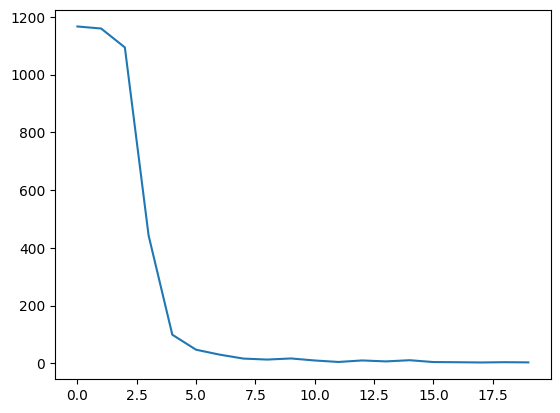

In [69]:
from itertools import islice

training_process = []

device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
cnn = CNN()
cnn.to(device)

optimizer = optim.SGD(cnn.parameters(), lr=0.01)
for epoch in range(20):
    sumloss = 0.0
    for data in islice(train_loader, 2000):
        inputs, targets = data
        inputs, targets = inputs.to(device), targets.to(device)
        optimizer.zero_grad()
        outputs = cnn(inputs)
        loss = F.cross_entropy(outputs, targets)
        loss.backward()
        optimizer.step()
        sumloss += loss.item()
    training_process.append(sumloss)
    test_accuracy(cnn, epoch)
    print("epoch: {}, loss: {:.4f}".format(epoch + 1, sumloss))
    
plt.plot(training_process)

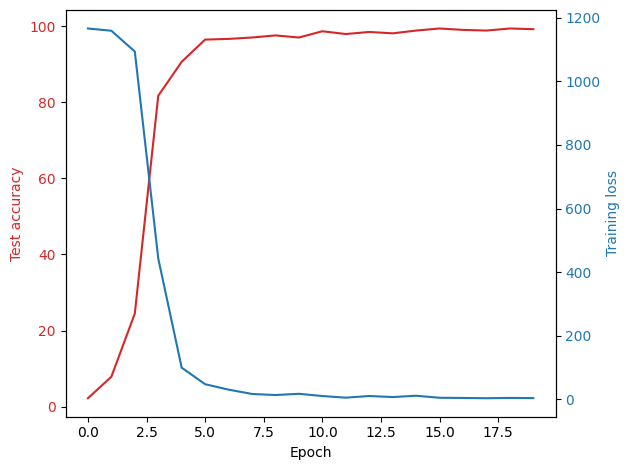

In [70]:
# Plot test accuracy data and training process in one graph with seperate axes
fig, ax1 = plt.subplots()

color = 'tab:red'
ax1.set_xlabel('Epoch')
ax1.set_ylabel('Test accuracy', color=color)
ax1.plot(test_accuracy_data, color=color)
ax1.tick_params(axis='y', labelcolor=color)

ax2 = ax1.twinx()

color = 'tab:blue'
ax2.set_ylabel('Training loss', color=color)
ax2.plot(training_process, color=color)
ax2.tick_params(axis='y', labelcolor=color)

fig.tight_layout()
plt.show()


In [71]:
# Calculate accuracy
correct = 0
total = 0
with torch.no_grad():
    for data in val_loader:
        x, y = data
        x = x.to(device)
        y = y.to(device)
        a = cnn(x)
        pred_y = torch.argmax(a, dim=1)
        correct += (pred_y == y).sum().item()
        total += pred_y.size(0)
        
print("Accuracy: {:.2f}%".format(correct / total * 100))

Accuracy: 99.45%


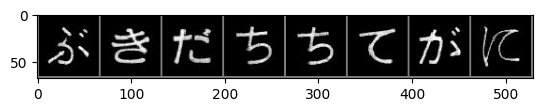

Prediction ['ぶ', 'き', 'だ', 'ち', 'ち', 'て', 'が', 'に']
Actual ['ぶ', 'き', 'だ', 'ち', 'ち', 'て', 'が', 'に']


In [72]:
# Visualise predictions
dataiter = iter(val_loader)

x, y = next(dataiter)
imgshow(torchvision.utils.make_grid(x))
x = x.to(device)
y = y.to(device)
a = cnn(x)
pred_y = torch.argmax(a, dim=1)
print("Prediction", [labels[i] for i in pred_y])
print("Actual", [labels[i] for i in y])